In [1]:
from vega_datasets import data
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline



In [2]:
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
temps.date = pd.to_datetime(temps.date)
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
temps = temps.set_index('date').sort_index()
temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [5]:
temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


## Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

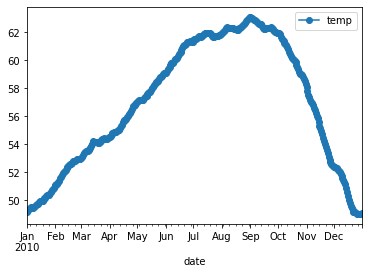

In [6]:
temps.resample('D').mean().plot(marker='o')

## Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

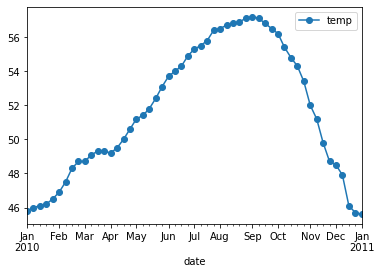

In [7]:
temps.resample('W').min().plot(marker='o')

## Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

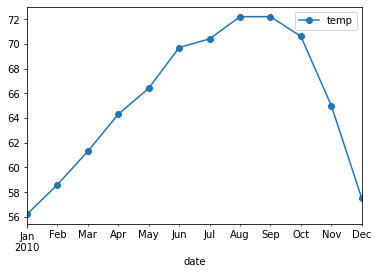

In [8]:
temps.resample('M').max().plot(marker='o')

## Which month is the coldest, on average?

In [9]:
temps.loc[temps.resample('M').mean().temp.idxmin()]

temp    49.4
Name: 2010-01-31 00:00:00, dtype: float64

### **Answer:** January

## Which month has the highest average temperature?

In [10]:
temps.loc[temps.resample('M').mean().temp.idxmax()]

temp    58.1
Name: 2010-09-30 00:00:00, dtype: float64

### September is the hottest month on average

## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
days_min_max = temps.resample('D').agg(['min', 'max'])
print(days_min_max.columns)
days_min_max['range'] = days_min_max[('temp', 'max')] - days_min_max[('temp', 'min')]
days_min_max.loc[days_min_max['range'].resample('M').mean().idxmax()]

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )


temp   min    56.4
       max    70.5
range         14.1
Name: 2010-09-30 00:00:00, dtype: float64

### Answer: September had largest variability

# Seattle Weather

In [12]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [13]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date').sort_index()

In [14]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## Which year and month combination has the highest amount of precipitation?

In [15]:
df.precipitation.resample('M').sum().idxmax(), df.precipitation.resample('M').sum().max()

(Timestamp('2015-12-31 00:00:00', freq='M'), 284.5)

### Answer: December of 2015

## Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

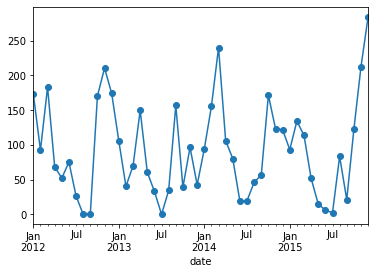

In [16]:
df.resample('M').sum().precipitation.plot(marker='o')

## Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

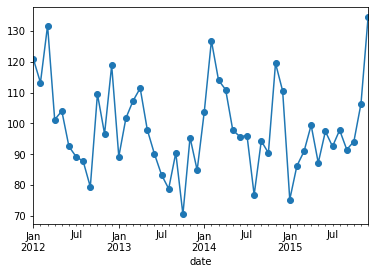

In [17]:
df.resample('M').sum().wind.plot(marker='o')

## Which year-month combination is the windiest?


In [18]:
df.resample('M').sum().wind.idxmax(), df.resample('M').sum().wind.max()

(Timestamp('2015-12-31 00:00:00', freq='M'), 134.6)

## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [19]:
df['is_sunny'] = df.weather.map({'sun': 1})
df.is_sunny.fillna(0)

date
2012-01-01    0.0
2012-01-02    0.0
2012-01-03    0.0
2012-01-04    0.0
2012-01-05    0.0
             ... 
2015-12-27    0.0
2015-12-28    0.0
2015-12-29    0.0
2015-12-30    1.0
2015-12-31    1.0
Name: is_sunny, Length: 1461, dtype: float64

In [20]:
df.is_sunny.resample('Y').sum().idxmax(), df.is_sunny.resample('Y').sum().max()

(Timestamp('2014-12-31 00:00:00', freq='A-DEC'), 211.0)

### Answer: 2014 is the sunniest year

## In which month does it rain the most?

In [21]:
df['month'] = df.index.month
df.groupby('month').sum().precipitation.idxmax(), df.groupby('month').sum().precipitation.max()

(11, 642.5)

### Answer: November

## Which month has the most number of days with a non-zero amount of precipitation?

In [22]:
df['rained'] = np.where(df.precipitation > 0, 1, 0)
df.groupby('month').sum().rained.idxmax(), df.groupby('month').sum().rained.max()

(12, 81)

### Answer: December

## Flights Problem Set

In [23]:
flights = data.flights_20k()
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## Convert any negative delays to 0.

In [24]:
flights.delay = np.where(flights.delay < 0, 0, flights.delay)
flights.head(10)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
2001-01-01 07:05:00,0,677,LAX,ABQ
2001-01-01 07:05:00,13,365,JAX,BHM
2001-01-01 07:15:00,24,938,MHT,BNA
2001-01-01 07:15:00,0,2106,BWI,LAS


## Which hour of the day has the highest average delay?

In [25]:
flights['hour'] = flights.index.hour

In [26]:
flights.groupby('hour').mean().delay.idxmax(), flights.groupby('hour').mean().delay.max()

(3, 302.5)

### Answer: 3am

## Does the day of the week make a difference in the delay amount?

In [27]:
flights['day'] = flights.index.weekday

In [28]:
flights.groupby('day').mean().delay.idxmax(), flights.groupby('day').mean().delay.max()

(4, 17.75759577278732)

In [29]:
flights.groupby('day').mean().delay

day
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

### Answer: Friday sucks

## Does the month make a difference in the delay amount?

In [30]:
flights['month'] = flights.index.month

In [31]:
flights.groupby('month').mean().delay.idxmax(), flights.groupby('month').mean().delay.max()

(2, 12.306106138107417)

In [32]:
flights.groupby('month').mean().delay

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

### Answer: Yes